Some visual representations can be of help to better understand the quality of the data collected.

In [2]:
import json

X_text = []
y_text = []

with open("reviews.jl") as f:
    lines = f.readlines()

for line in lines:

    parsed_json = json.loads(line)

    X_text.append(parsed_json["text"])
    y_text.append(parsed_json["rating"])

print('The dataset has ' + str(len(X_text)) + ' records')

The dataset has 11147 records


Some samples of reviews

In [3]:
import random

for _ in range(5):
    i = random.randint(0,len(X_text))
    print('RATING: ' + y_text[i])
    print('REVIEW: ' + X_text[i])
    print()

RATING: 5
REVIEW: Non lo volevo acquistare all'inizio però poi avevo voglia di qualche call of duty perché ero anni senza usarne uno e devo dire che non mi ha deluso. Hanno aggiunto delle piccole missioni secondarie che non ci sono mai state prima e questo è stato molto carino. La storia è quella che è ed in poche ore lo si completa però merita più degli altri usciti negli ultimi anni. La zombie ha sempre il suo fascino ed è sempre utile per giocare con amici. Consigliato a tutti!

RATING: 1
REVIEW: E il kindle? perché niente funziona sul kindle? Impossibile aprire l'applicazione solo una gran perdita di tempo e se contatti il servizio clienti neanche rispondono.

RATING: 2
REVIEW: l'app non riscontra le mie esigenze in veste grafica .

RATING: 5
REVIEW: Scarpe Perfette sia per la misura che per le condizioni, ho preso il mio numero esatto e la calzata è giusta...la spedizione davvero rapida, arrivate prima del previsto!

RATING: 4
REVIEW: Ho acquistato il gioco, soprattutto, nella spe

How is distributed the dataset?

1-star reviews: 1615	 percentage: 14.49%
2-star reviews: 1313	 percentage: 11.78%
3-star reviews: 1810	 percentage: 16.24%
4-star reviews: 2600	 percentage: 23.32%
5-star reviews: 3809	 percentage: 34.17%


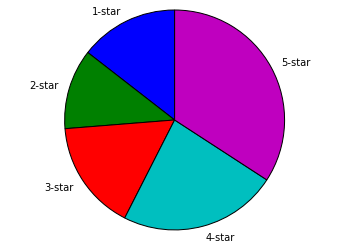

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

one_star = 0
two_star = 0
three_star = 0
four_star = 0
five_star = 0

for rating in y_text:
    if rating == '1':
        one_star += 1
    elif rating == '2':
        two_star += 1
    elif rating == '3':
        three_star += 1
    elif rating == '4':
        four_star += 1
    else:
        five_star += 1

print('1-star reviews: {}\t percentage: {:.2%}'.format(one_star,one_star/len(y_text)))
print('2-star reviews: {}\t percentage: {:.2%}'.format(two_star,two_star/len(y_text)))
print('3-star reviews: {}\t percentage: {:.2%}'.format(three_star,three_star/len(y_text)))
print('4-star reviews: {}\t percentage: {:.2%}'.format(four_star,four_star/len(y_text)))
print('5-star reviews: {}\t percentage: {:.2%}'.format(five_star,five_star/len(y_text)))

labels = '1-star', '2-star', '3-star', '4-star', '5-star'
sizes = [one_star, two_star, three_star, four_star, five_star]

patches, texts = plt.pie(sizes, labels=labels, startangle=90)
plt.axis('equal')
plt.savefig('fig_1.png')
plt.show()

In [5]:
import re

n_words = 0

words_set = set()

words_dictionary = {}

for sentence in X_text:
    words = re.sub(r'[^\w\s]','',sentence).lower().split(" ")
    n_words += len(words)

    for word in words:
        words_set.add(word)

        if word in words_dictionary:
            words_dictionary[word] += 1
        else:
            words_dictionary[word] = 1
            
print("Number of total words: {}".format(n_words))
print("Average number of words per review: {:.2f}".format(n_words/len(X_text)))
print("Number of unique words: {}".format(len(words_set)))
print("Average repetition of words: {:.2f}".format(n_words/len(words_set)))

Number of total words: 413300
Average number of words per review: 37.08
Number of unique words: 26787
Average repetition of words: 15.43
